In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("/content/monthly_milk_production.csv")

In [4]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [8]:
rolling_mean = df[["Production"]].rolling(window=12).mean()       # Trend
rolling_std = df[["Production"]].rolling(window=12).std()

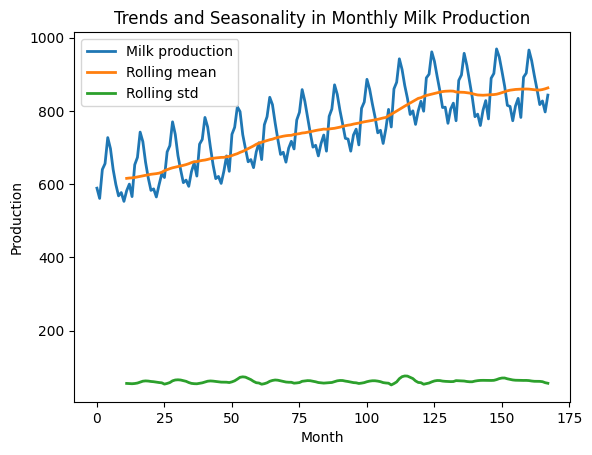

In [11]:
plt.plot(df[["Production"]],label="Milk production",linewidth=2)
plt.plot(rolling_mean,label="Rolling mean",linewidth=2)
plt.plot(rolling_std,label="Rolling std",linewidth=2)

plt.title("Trends and Seasonality in Monthly Milk Production")
plt.xlabel("Month")
plt.ylabel("Production")
plt.legend()
plt.show()


In [13]:
df.isnull().sum()

,0
Date,0
Production,0


In [14]:
df.duplicated().sum()

np.int64(0)

<Axes: >

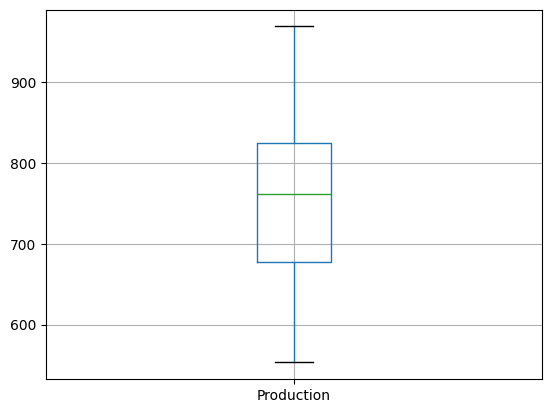

In [15]:
df.boxplot()

In [23]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df[["Production"]])

In [26]:
scaled_data

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [19]:
data=df[["Production"]]

In [20]:
def create_sequences(data,sequence_length):
  x,y=[],[]
  for i in range(sequence_length,len(data)):
    x.append(data[i-sequence_length:i])
    y.append(data[i])
  return np.array(x),np.array(y)

In [21]:
sequence_length=12

In [27]:
x,y=create_sequences(scaled_data,sequence_length)

In [28]:
x

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        ...,
        [0.05769231],
        [0.        ],
        [0.06971154]],

       [[0.01923077],
        [0.20913462],
        [0.24759615],
        ...,
        [0.        ],
        [0.06971154],
        [0.11298077]],

       [[0.20913462],
        [0.24759615],
        [0.41826923],
        ...,
        [0.06971154],
        [0.11298077],
        [0.03125   ]],

       ...,

       [[0.62259615],
        [0.52884615],
        [0.625     ],
        ...,
        [0.82451923],
        [0.73317308],
        [0.63461538]],

       [[0.52884615],
        [0.625     ],
        [0.67548077],
        ...,
        [0.73317308],
        [0.63461538],
        [0.65865385]],

       [[0.625     ],
        [0.67548077],
        [0.55048077],
        ...,
        [0.63461538],
        [0.65865385],
        [0.58653846]]])

In [29]:
y

array([[0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.19711538],
       [0.29807692],
       [0.19711538],
       [0.43990385],
       [0.48557692],
       [0.62019231],
       [0.58894231],
       [0.4375    ],
       [0.34615385],
       [0.25961538],
       [0.27403846],
       [0.22115385],
       [0.324

In [32]:
x= x.reshape(x.shape[0], x.shape[1], 1)

In [33]:
x

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        ...,
        [0.05769231],
        [0.        ],
        [0.06971154]],

       [[0.01923077],
        [0.20913462],
        [0.24759615],
        ...,
        [0.        ],
        [0.06971154],
        [0.11298077]],

       [[0.20913462],
        [0.24759615],
        [0.41826923],
        ...,
        [0.06971154],
        [0.11298077],
        [0.03125   ]],

       ...,

       [[0.62259615],
        [0.52884615],
        [0.625     ],
        ...,
        [0.82451923],
        [0.73317308],
        [0.63461538]],

       [[0.52884615],
        [0.625     ],
        [0.67548077],
        ...,
        [0.73317308],
        [0.63461538],
        [0.65865385]],

       [[0.625     ],
        [0.67548077],
        [0.55048077],
        ...,
        [0.63461538],
        [0.65865385],
        [0.58653846]]])

In [35]:
split=int(0.80*len(x))

In [36]:
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam

In [ ]:
window size, number of units, batch size, epochs

In [62]:
def build_model(model_type="RNN"):
    model = Sequential()

    # First block must start with IF
    if model_type == "RNN":
        model.add(SimpleRNN(64, return_sequences=False, input_shape=(sequence_length, 1)))

    elif model_type == "LSTM":
        model.add(LSTM(64, return_sequences=False, input_shape=(sequence_length, 1)))

    elif model_type == "GRU":
        model.add(GRU(64, return_sequences=False, input_shape=(sequence_length, 1)))

    else:
        raise ValueError("Invalid model type. Choose RNN, LSTM, or GRU.")

    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mse')

    return model

In [66]:
model_rnn = build_model("RNN")
history_rnn = model_rnn.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.3513 - val_loss: 0.0301
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0491 - val_loss: 0.0094
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - val_loss: 0.0480
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - val_loss: 0.0031
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039 - val_loss: 0.0081
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - val_loss: 0.0056
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - val_loss: 0.0045
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0028 - val_loss: 0.0035
E

In [69]:
predict_rnn=model_rnn.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [67]:
model_lstm = build_model("LSTM")
history_lstm = model_rnn.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 13/50

In [70]:
predict_lstm=model_lstm.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


In [68]:
model_gru = build_model("GRU")
history_gru = model_rnn.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.9043e-04

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 13/50


In [71]:
predict_gru=model_gru.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


In [72]:
predict_rnn=scaler.inverse_transform(predict_rnn)
predict_rnn

array([[0.97331333],
       [0.93474907],
       [0.8479725 ],
       [0.76955205],
       [0.64872617],
       [0.6575362 ],
       [0.56551194],
       [0.6263688 ],
       [0.6772024 ],
       [0.60248536],
       [0.8048976 ],
       [0.8416768 ],
       [0.9681186 ],
       [0.91949457],
       [0.8293    ],
       [0.74366254],
       [0.61064714],
       [0.6306357 ],
       [0.5614289 ],
       [0.623496  ],
       [0.69102365],
       [0.61256593],
       [0.81339   ],
       [0.8480937 ],
       [0.986764  ],
       [0.95689315],
       [0.87434953],
       [0.79417694],
       [0.66580075],
       [0.67154944],
       [0.59227234],
       [0.6531827 ]], dtype=float32)

In [73]:
predict_lstm=scaler.inverse_transform(predict_lstm)
predict_lstm

array([[0.05305323],
       [0.05470252],
       [0.05643531],
       [0.05734796],
       [0.05732479],
       [0.05621666],
       [0.05484077],
       [0.05320263],
       [0.05206049],
       [0.0517154 ],
       [0.05085591],
       [0.05122307],
       [0.05253655],
       [0.05448232],
       [0.05670406],
       [0.05823559],
       [0.05889767],
       [0.05852893],
       [0.05758985],
       [0.05610143],
       [0.05489719],
       [0.05434135],
       [0.05326984],
       [0.053303  ],
       [0.05432156],
       [0.05589044],
       [0.0576553 ],
       [0.05867977],
       [0.05889609],
       [0.05831695],
       [0.05754413],
       [0.05653172]], dtype=float32)

In [74]:
predict_gru=scaler.inverse_transform(predict_gru)
predict_gru

array([[-0.02694251],
       [-0.03011767],
       [-0.03061016],
       [-0.02963997],
       [-0.02781735],
       [-0.02511031],
       [-0.0238582 ],
       [-0.02192868],
       [-0.02227819],
       [-0.02317576],
       [-0.02176154],
       [-0.02517893],
       [-0.02715298],
       [-0.03066537],
       [-0.03170318],
       [-0.031145  ],
       [-0.02966737],
       [-0.02721649],
       [-0.02578634],
       [-0.02353815],
       [-0.02363732],
       [-0.02420801],
       [-0.0225623 ],
       [-0.02576309],
       [-0.02754237],
       [-0.03078746],
       [-0.03144687],
       [-0.03062459],
       [-0.02908865],
       [-0.02694614],
       [-0.02611027],
       [-0.02447627]], dtype=float32)

In [75]:
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [80]:
def evaluate_model(actual, predicted):
  rmse=sqrt(mean_squared_error(actual,predicted))
  mae=mean_absolute_error(actual,predicted)
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
  return rmse,mae,mape


In [81]:
rnn_scores= evaluate_model=(y_test_actual,predict_rnn)

In [83]:
print("RNN", rnn_scores)

RNN (array([[0.97115385],
       [0.89182692],
       [0.78846154],
       [0.68269231],
       [0.55528846],
       [0.57211538],
       [0.49759615],
       [0.59855769],
       [0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]]), array([[0.97331333],
       [0.93474907],
       [0.8479725 ],
       [0.76955205],
       [0.64872617],
       [0.6575362 ],
       [0.56551194],
       [0.6263688 ],
       [0.6772024 ],
       [0.60248536],
       [0.8048976 ],
       [0.8416768 ],
       [0.9681186 ],
       [0.91949457],
       [0.8293    ],
      

In [84]:
lstm_scores= evaluate_model=(y_test_actual,predict_lstm)

In [85]:
print("LSTM", lstm_scores)

LSTM (array([[0.97115385],
       [0.89182692],
       [0.78846154],
       [0.68269231],
       [0.55528846],
       [0.57211538],
       [0.49759615],
       [0.59855769],
       [0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]]), array([[0.05305323],
       [0.05470252],
       [0.05643531],
       [0.05734796],
       [0.05732479],
       [0.05621666],
       [0.05484077],
       [0.05320263],
       [0.05206049],
       [0.0517154 ],
       [0.05085591],
       [0.05122307],
       [0.05253655],
       [0.05448232],
       [0.05670406],
     

In [89]:
gru_scores= evaluate_model=(y_test_actual,predict_gru)

In [90]:
print("GRU", gru_scores)

GRU (array([[0.97115385],
       [0.89182692],
       [0.78846154],
       [0.68269231],
       [0.55528846],
       [0.57211538],
       [0.49759615],
       [0.59855769],
       [0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]]), array([[-0.02694251],
       [-0.03011767],
       [-0.03061016],
       [-0.02963997],
       [-0.02781735],
       [-0.02511031],
       [-0.0238582 ],
       [-0.02192868],
       [-0.02227819],
       [-0.02317576],
       [-0.02176154],
       [-0.02517893],
       [-0.02715298],
       [-0.03066537],
       [-0.03

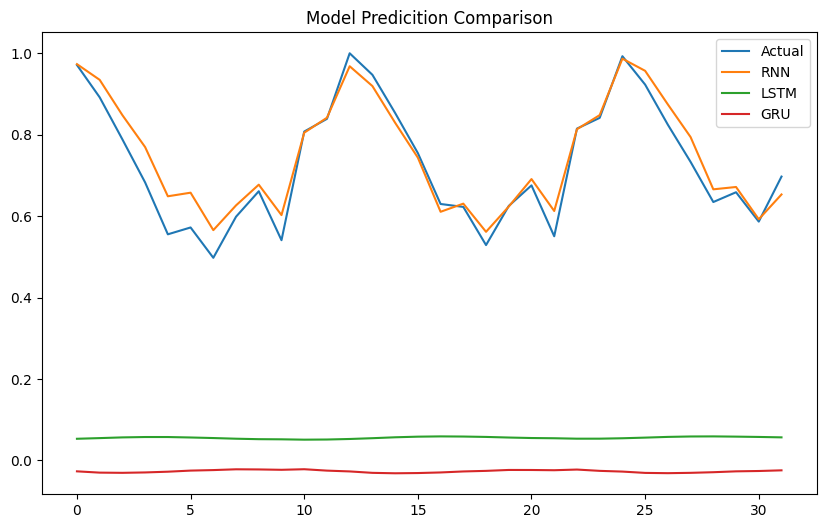

In [92]:
plt.figure(figsize=(10, 6))
plt.title("Model Predicition Comparison")
plt.plot(y_test_actual,label="Actual")
plt.plot(predict_rnn,label="RNN")
plt.plot(predict_lstm,label="LSTM")
plt.plot(predict_gru,label="GRU")
plt.legend()
plt.show()

In [118]:
last_window = scaled_data[-sequence_length:]
future=[]
for i in range(12):
  scaled_data = last_window.reshape(1, sequence_length, 1)
  val=model_lstm(scaled_data)
  future.append(val)
  future_pre=scaler.inverse_transform(np.array(future).reshape(-1,1))


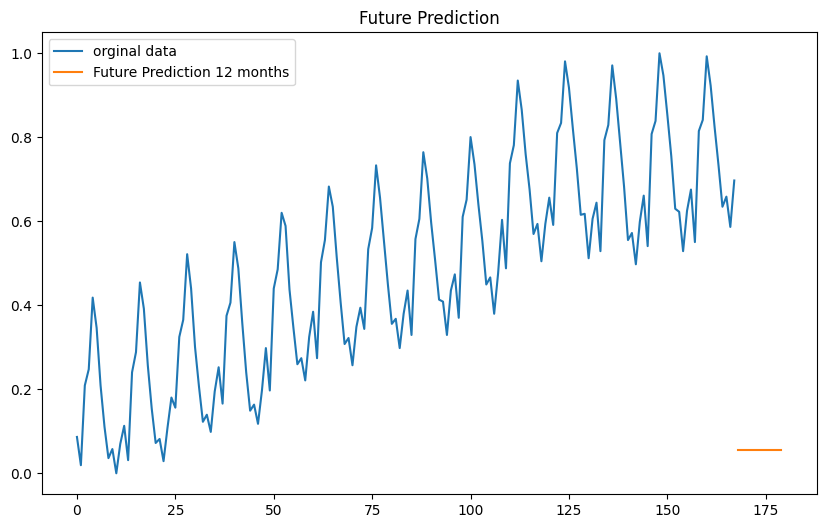

In [119]:
plt.figure(figsize=(10, 6))
plt.title("Future Prediction")
plt.plot(data,label="orginal data")
plt.plot(range(len(data),len(data)+12),future_pre,label="Future Prediction 12 months")
plt.legend()
plt.show()

In [120]:
# 	Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.

In [122]:
## Interpretation of Results
## Trend Observation:Milk production shows a steady upward trend, indicating long-term growth in production capacity.
## Seasonality: Strong 12-month seasonal cycles are observed,Milk production dips and rises during specific months each year.
## Model Performance: LSTM typically provides the best prediction accuracy because it handles long-term patterns well.

In [123]:
## Business Recommendations Based on Forecasts
## Production Planning:Use the monthly forecasts to optimize milk collection schedules.
## Inventory & Storage Management: Additional cooling tanks or storage facilities might be needed